In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from itertools import product

from copy import deepcopy

## MRM and CRR definition

In [2]:
mrm_resonances = np.arange(0, 3200, 400)
crr_resonances = np.arange(0, 3200, 400)
laser_frequency = np.arange(0, 3200, 400)

cooling = -1.5
heating = 1

debug = 0

step_sweep = 200

no_iterations = int(1e5+1) # 1 million 1 iterations
# no_iterations = int(1e4+1) # 10 thousand 1 iterations

no_mrm_internal_alignment_steps = 20
no_crr_internal_alignment_steps = 20

no_mrm_cycling_steps = 3
no_crr_cycling_steps = 6

no_mrms = 8
no_crrs = 8
no_laser_wavelengths = 8
no_resonances = 6
center_resonance = 3

mrm_fsr = np.arange(1780, 1825, no_resonances)
mrm_fabrication_variation = 400
mrm_optical_bandwidth = 100
crr_fsr = np.arange(1780, 1825, no_resonances)
crr_fabrication_variation = 400
crr_optical_bandwidth = 300

mrm_resonances_die_wafer_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_die_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_wafer_variation = np.zeros((no_mrms,no_resonances,no_iterations))
mrm_resonances_ideal = np.zeros((no_mrms,no_resonances,no_iterations))

mrm_die_variation = np.random.uniform(-mrm_fabrication_variation/2, mrm_fabrication_variation/2, size = (no_laser_wavelengths,no_iterations)) # Fabrication variation of the MRM resonances
mrm_wafer_variation = np.random.uniform(0, np.mean(mrm_fsr), no_iterations) # Start variation of the MRM resonances

for iter_no in range(no_iterations):
  for res_no in range(no_resonances):
    mrm_resonances_die_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_die_variation[:,iter_no] + mrm_wafer_variation[iter_no]
    mrm_resonances_die_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_die_variation[:,iter_no] 
    mrm_resonances_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr + mrm_wafer_variation[iter_no]
    mrm_resonances_ideal[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*mrm_fsr
    
crr_resonances_die_wafer_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_die_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_wafer_variation = np.zeros((no_crrs,no_resonances,no_iterations))
crr_resonances_ideal = np.zeros((no_crrs,no_resonances,no_iterations))

crr_die_variation = np.random.uniform(-crr_fabrication_variation/2, crr_fabrication_variation/2, size = (no_laser_wavelengths,no_iterations)) # Fabrication variation of the CRR resonances
crr_wafer_variation = np.random.uniform(0, np.mean(crr_fsr), no_iterations) # Start variation of the CRR resonances

for iter_no in range(no_iterations):
  for res_no in range(no_resonances):
    crr_resonances_die_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_die_variation[:,iter_no] + crr_wafer_variation[iter_no]
    crr_resonances_die_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_die_variation[:,iter_no] 
    crr_resonances_wafer_variation[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr + crr_wafer_variation[iter_no]
    crr_resonances_ideal[:,res_no,iter_no] = np.arange(0, 3200, 400) + (res_no-center_resonance)*crr_fsr

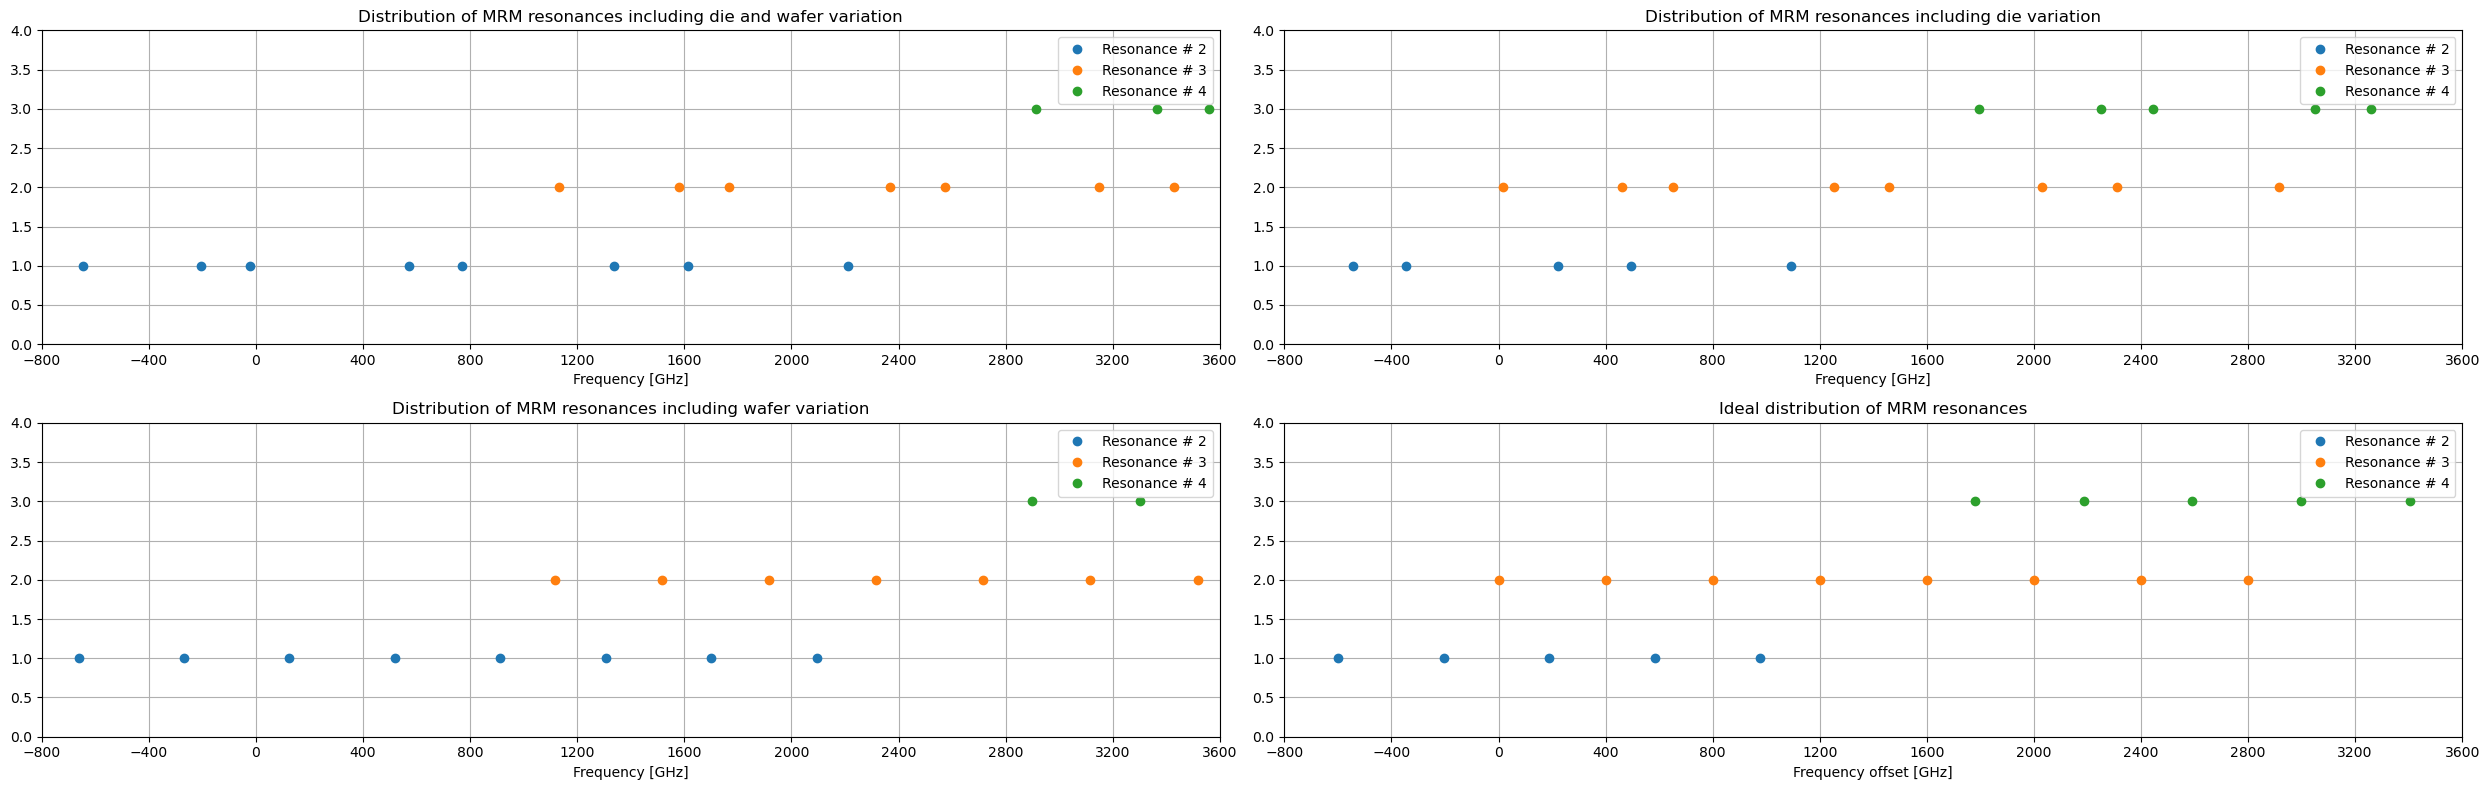

In [3]:
plt.figure(figsize=(25, 8))
for res_no in [2,3,4]:  
  plt.subplot(2,2,1)
  plt.plot(mrm_resonances_die_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,2)
  plt.plot(mrm_resonances_die_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including die variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,3)
  plt.plot(mrm_resonances_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of MRM resonances including wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,4)
  plt.plot(mrm_resonances_ideal[:,res_no,no_mrms], np.ones(8)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-800, 3600])
  plt.xticks(np.arange(-800, 4000, 400))
  plt.ylim([0, 4.0])
  plt.xlabel("Frequency offset [GHz]")
  plt.title("Ideal distribution of MRM resonances")
plt.tight_layout()

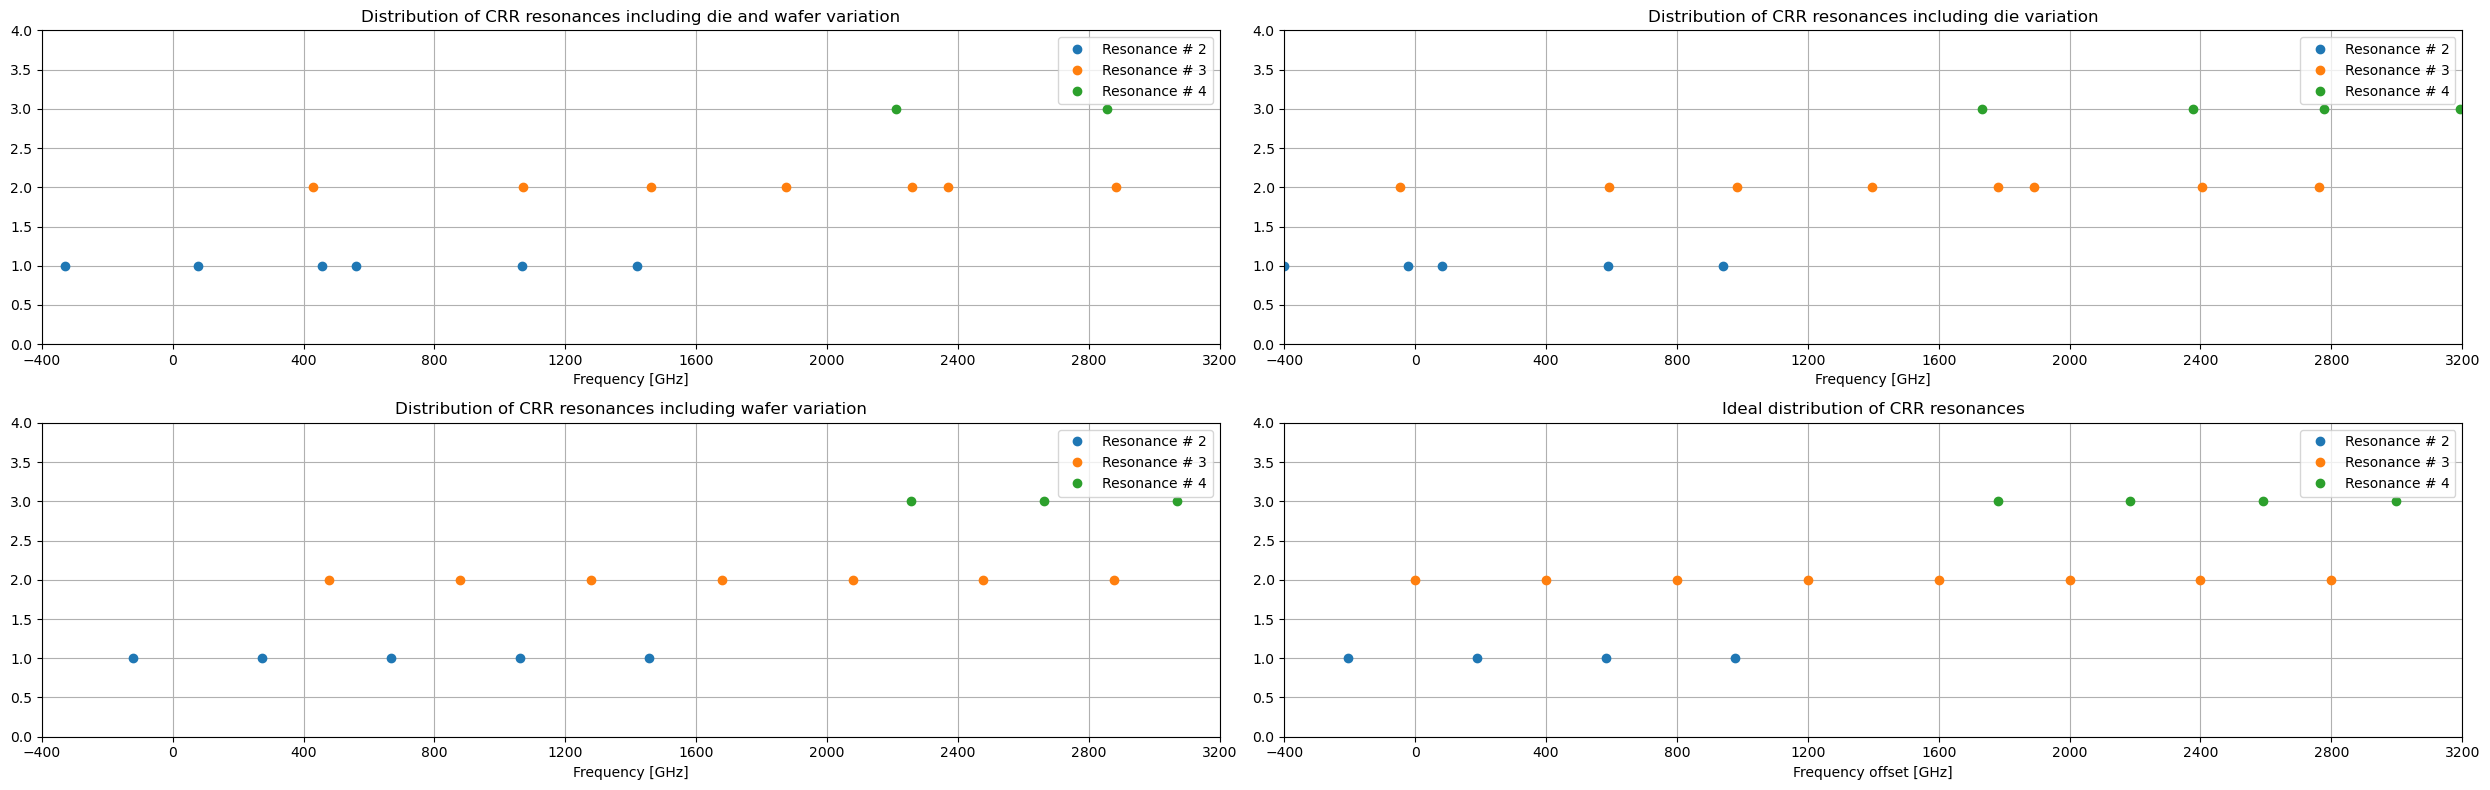

In [4]:
plt.figure(figsize=(25,8))
for res_no in [2,3,4]:  
  plt.subplot(2,2,1)
  plt.plot(crr_resonances_die_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,2)
  plt.plot(crr_resonances_die_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including die variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,3)
  plt.plot(crr_resonances_wafer_variation[:,res_no,0], np.ones(no_mrms)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.title("Distribution of CRR resonances including wafer variation")
  plt.xlabel("Frequency [GHz]")
  plt.subplot(2,2,4)
  plt.plot(crr_resonances_ideal[:,res_no,no_mrms], np.ones(8)*(res_no-1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-400, 3200])
  plt.xticks(np.arange(-400, 3600, 400))
  plt.ylim([0, 4.0])
  plt.xlabel("Frequency offset [GHz]")
  plt.title("Ideal distribution of CRR resonances")
plt.tight_layout()

## MRM wavelength sequential assignment

In [5]:
def order_check(device_resonances_iter):
  device_assigned = []
  laser_assigned = []
  step_assigned = []
  resonance_assigned = []
  device_resonances_copy = deepcopy(device_resonances_iter)
  for device_no in range(no_mrms): # sweeping for mrm order
    for step_no in [-1, 1]:
        for laser_no in range(no_laser_wavelengths):
              confirmed = False
              resonances_location = device_resonances_copy[device_no,:] - laser_frequency[laser_no] + heating * step_no * step_sweep 
              if debug:
                print("device_no: ", device_no, ", step_no: ", step_no, ", laser_no: ", laser_no, ", laser_frequency:", laser_frequency[laser_no],", device_resonance_iter:", device_resonances_copy[device_no,:], ", resonances_location: ", resonances_location, ", heating/cooling:", heating * step_no * step_sweep)
              if step_no == -1:
                for res_no in range(no_resonances):
                  if ((resonances_location[res_no]) <= mrm_optical_bandwidth/2) and ((resonances_location[res_no]) >= - step_sweep - mrm_optical_bandwidth/2):
                    if debug:
                      print("Negative Step Entered")
                    confirmed = True
              else:
                for res_no in range(no_resonances):
                  if ((resonances_location[res_no]  >= -mrm_optical_bandwidth/2) and ((resonances_location[res_no]) <= step_sweep + mrm_optical_bandwidth/2)):
                    if debug:
                      print(" Positive Step Entered")
                    confirmed = True
              if confirmed:
                device_assigned.append(device_no)
                laser_assigned.append(laser_no)
                step_assigned.append(step_no)
                resonance_assigned.append(np.argmin(resonances_location * step_no))
                break
  return np.array(device_assigned), np.array(laser_assigned), np.array(step_assigned), np.array(resonance_assigned)

def device_heating(device_resonance_iter, additional_heating):
  device_resonance_cycling = deepcopy(device_resonance_iter)
  for device_no in range(no_mrms):
    device_resonance_cycling[device_no,:] = device_resonance_iter[device_no,:] + additional_heating * step_sweep * 2
  return device_resonance_cycling



mrm_assigned:  [0 0 1 1 2 2 3 4 4 5 5 6 6 7 7]
laser_assigned:  [1 1 2 7 3 4 4 1 1 6 2 3 3 4 0]
step_assigned:  [-1  1 -1  1 -1  1  1 -1  1 -1  1 -1  1 -1  1]
mrm_resonances_iter:  [-1385.4577966   -887.42356603  -403.54996732  -306.26130535
   402.38405533   722.18261888  1195.17415723  1602.10705191]
mrm_resonances_iter:  [ 394.5422034   898.57643397 1388.45003268 1491.73869465 2206.38405533
 2532.18261888 3011.17415723 3424.10705191]
laser_frequency:  [   0  400  800 1200 1600 2000 2400 2800]
Counts of MRMs vs Laser:  [2 2 2 1 2 2 2 2]
count_idx:  [(1, -0.5, 3, 1)]


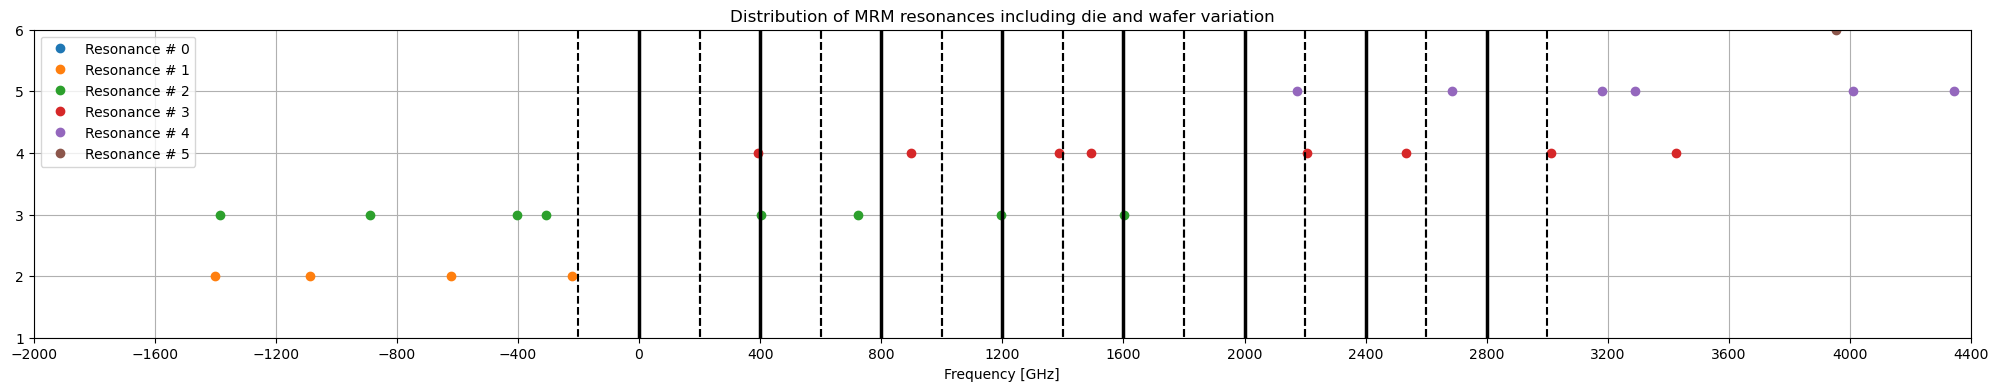

In [6]:
debug = 0
iter_no = 1

mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)

print("mrm_assigned: ", mrm_assigned)
print("laser_assigned: ", laser_assigned)
print("step_assigned: ", step_assigned)
print("mrm_resonances_iter: ", mrm_resonances_iter[:,2])
print("mrm_resonances_iter: ", mrm_resonances_iter[:,3])
print("laser_frequency: ", laser_frequency)

counts = np.bincount(mrm_assigned)
print("Counts of MRMs vs Laser: ", counts)

count_idx = []
if np.min(counts) == 2:
  count_idx.append((iter_no, -0.5, 0, 2))
else:
  for idx in range(no_mrms):
    if counts[no_mrms - idx - 1] == 1:
      if no_mrms - idx - 1 < 4:
        count_idx.append((iter_no, -0.5, no_mrms - idx - 1, 1))
      else:
        count_idx.append((iter_no, 0,no_mrms - idx - 1, 1))
        break

print("count_idx: ", count_idx)

plt.figure(figsize=(25,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

In [7]:
count_idx = []

for iter_no in range(no_iterations):
  mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
  mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)
  count = np.bincount(mrm_assigned)
  if np.min(count) == 2:
    count_idx.append((iter_no, -0.5, -1, 2))
  else:
    for idx in range(no_mrms):
      if count[no_mrms - idx - 1] == 1:
        if (no_mrms - idx - 1) < 4:
          count_idx.append((iter_no, -0.5, no_mrms - idx - 1, 1))
        if (no_mrms - idx - 1) >= 4:
          count_idx.append((iter_no, 0, no_mrms - idx - 1, 1))
        break

count_idx = np.array(count_idx)
count_idx.shape

(100001, 4)

In [8]:
mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)
mrm_assigned

array([0, 0, 1, 1, 2, 3, 3, 4, 4, 5, 5, 6, 6, 7, 7])

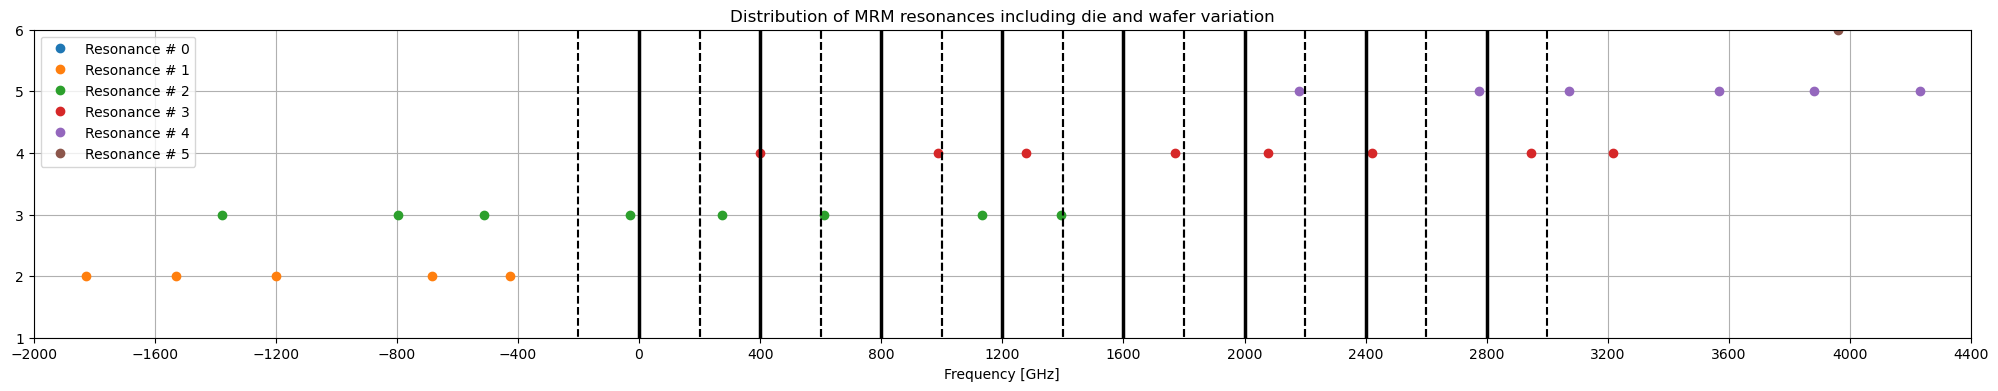

In [9]:
plt.figure(figsize=(25,4))
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

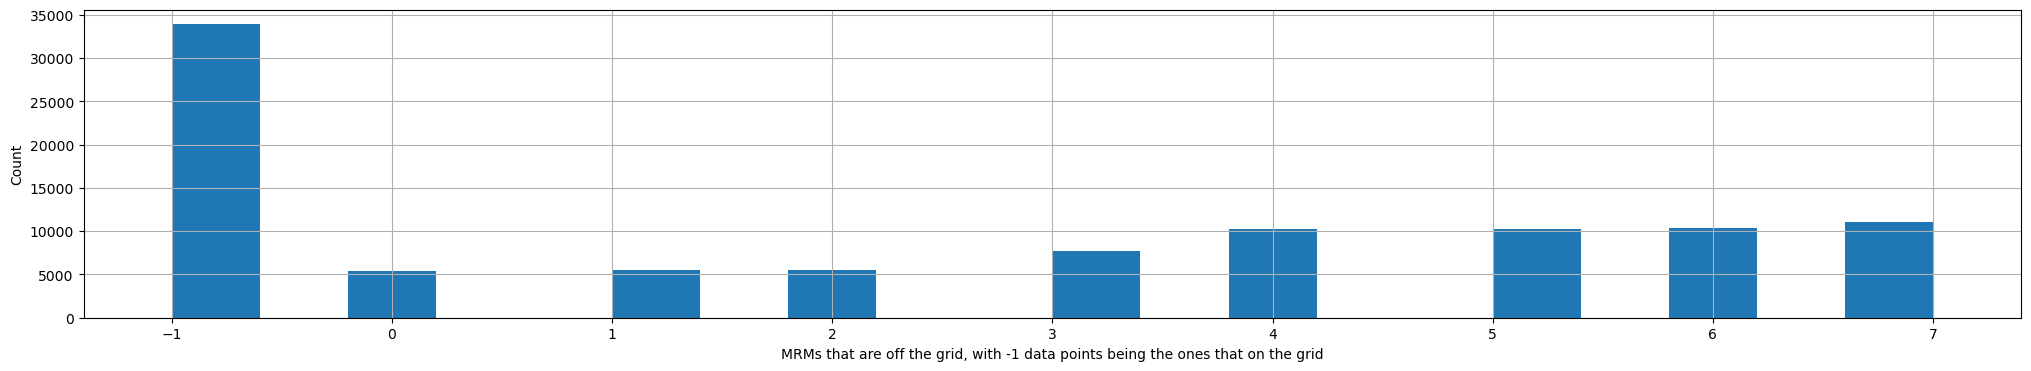

In [10]:
plt.figure(figsize=(25,4))
plt.hist(count_idx[:,2].flatten(), rwidth=1.0, bins = 20)
plt.grid(True)
plt.xlabel("MRM number")
plt.ylabel("Count")
plt.xlabel("MRMs that are off the grid, with -1 data points being the ones that on the grid")
plt.show()

iter_no:  8
count_idx:  [ 8.  -0.5 -1.   2. ]
mrm_assigned:  [0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7]
laser_assigned:  [3 4 0 0 1 1 6 2 7 3 4 0 0 1 1 1]
step_assigned:  [-1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1 -1  1]
mrm_resonances_iter:  [-356.2157281   -47.84906795  381.68383312  739.69763638 1124.74448845
 1643.21020638 2044.06958807 2194.54069109]
mrm_resonances_iter:  [1423.7842719  1738.15093205 2173.68383312 2537.69763638 2928.74448845
 3453.21020638 3860.06958807 4016.54069109]
laser_frequency:  [   0  400  800 1200 1600 2000 2400 2800]
count_idx_iter:  [ 8.  -0.5 -1.   2. ]


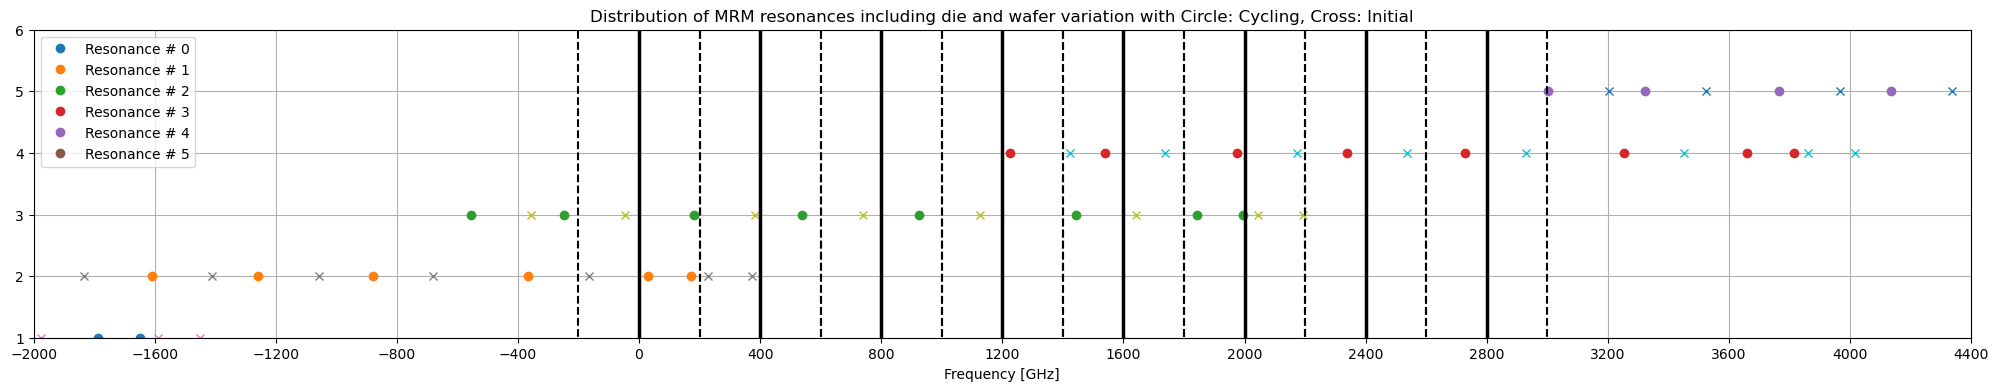

In [11]:
focus_id = -1

for iter_no in range(no_iterations):
    if (count_idx[iter_no,2] >=focus_id) and (count_idx[iter_no,2] <(focus_id+1)):
        break

print("iter_no: ", iter_no)
print("count_idx: ", count_idx[iter_no])

iter_no = iter_no
debug = 0

mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)#, additional_heating=0, laser_frequency=laser_frequency)

print("mrm_assigned: ", mrm_assigned)
print("laser_assigned: ", laser_assigned)
print("step_assigned: ", step_assigned)
print("mrm_resonances_iter: ", mrm_resonances_iter[:,2])
print("mrm_resonances_iter: ", mrm_resonances_iter[:,3])
print("laser_frequency: ", laser_frequency)

count_idx_iter = count_idx[iter_no, :]
print("count_idx_iter: ", count_idx_iter)

mrm_rotated_assigned = device_heating(mrm_resonances_iter, count_idx_iter[1])

plt.figure(figsize=(25,4))
for res_no in range(no_resonances):
  plt.plot(mrm_rotated_assigned[:, res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'o', label="Resonance # %d" % res_no)
for res_no in range(no_resonances):
  plt.plot(mrm_resonances_iter[:,res_no], np.ones(no_laser_wavelengths)*(res_no+1), 'x')#, label="Resonance # %d" % res_no)
  plt.legend()
  plt.grid(True)
  plt.xlim([-2000, 4400])
  plt.xticks(np.arange(-2000, 4800, 400))
  plt.title("Distribution of MRM resonances including die and wafer variation with Circle: Cycling, Cross: Initial")
  plt.xlabel("Frequency [GHz]")
for laser_no in range(no_laser_wavelengths):
  plt.plot(laser_frequency[laser_no] * np.ones(11), np.linspace(0,6,11), 'k', linewidth=2.5)
  plt.plot(laser_frequency[laser_no] * np.ones(11)+200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
  plt.plot(laser_frequency[laser_no] * np.ones(11)-200, np.linspace(0,6,11), 'k', linewidth=1.5, linestyle='dashed')
plt.ylim([1,6])
plt.legend()
plt.show()

In [12]:
def sequential(device_resonances_iter, count_idx_iter):
  additional_heating = count_idx_iter[1]
  devices_out_band = count_idx_iter[2]
  device_preheated = device_heating(device_resonances_iter, additional_heating)
  
  mrm_focus =  int(devices_out_band)
  if devices_out_band == -1:
    mrm_focus = int(0)
  if debug:
    print("mrm_focus: ", mrm_focus)
  device_assigned = []
  laser_assigned = []
  laser_wavelength_locked = []
  heat_assigned = []
  heat_range = []
  resonance_assigned = []
  
  comp_check = -mrm_optical_bandwidth/2 
  
  for laser_no in range(no_laser_wavelengths):
    resonances_location = device_preheated[mrm_focus,:]  - laser_frequency[laser_no] +  step_sweep * 2
    for res_no in range(no_resonances):
      if ((resonances_location[res_no] >= -mrm_optical_bandwidth/2) and (resonances_location[res_no] <= (step_sweep *2 + mrm_optical_bandwidth/2))):
        if comp_check == -mrm_optical_bandwidth/2:
          comp_check = resonances_location[res_no]
          device_assigned.append(mrm_focus)
          laser_assigned.append(laser_no)
          heat_assigned.append(laser_frequency[laser_no] - device_preheated[mrm_focus,res_no])
          heat_range.append(laser_frequency[laser_no] - device_preheated[mrm_focus,res_no])
          resonance_assigned.append(res_no)
        if resonances_location[res_no] > comp_check:
          laser_assigned[0] = laser_no
          heat_assigned[0] = laser_frequency[laser_no] - device_preheated[mrm_focus,res_no]
          resonance_assigned[0] = res_no
  
  for device_no in np.linspace(mrm_focus-1, 0, mrm_focus, dtype=int):
    mrm_locked = False
    laser_search = laser_frequency[laser_assigned[-1]]
    
    step = 6
    
    resonances_location = device_preheated[device_no,:] - laser_search + step_sweep * step
    for res_no in range(no_resonances):
      if ((resonances_location[res_no] >= -mrm_optical_bandwidth) and (resonances_location[res_no] <= (step_sweep * step + mrm_optical_bandwidth))):
        laser_locked = resonances_location[res_no] - step_sweep * step
        device_assigned.append(device_no)
        laser_assigned.append(laser_assigned[-1]-1)
        heat_assigned.append(laser_frequency[laser_assigned[-1]-1] - device_preheated[device_no,res_no])
        heat_range.append(laser_frequency[laser_assigned[-1]] - device_preheated[device_no,res_no])
        resonance_assigned.append(res_no)
        mrm_locked = True
    
    if not mrm_locked:
      step = -3
      resonances_location = device_preheated[device_no,:] - laser_search + step_sweep * step
      for res_no in range(no_resonances):
        if ((resonances_location[res_no] <= mrm_optical_bandwidth) and (resonances_location[res_no] >= (step_sweep * step - mrm_optical_bandwidth))):
          device_assigned.append(device_no)
          laser_assigned.append(laser_assigned[-1]-1)
          heat_assigned.append(laser_frequency[laser_assigned[-1]-1] - device_preheated[device_no,res_no])
          heat_range.append(laser_frequency[laser_assigned[-1]] - device_preheated[device_no,res_no])
          resonance_assigned.append(res_no)
          mrm_locked = True
          break
  
  if mrm_focus < 7:
    for device_no in np.linspace(7, mrm_focus+1, 7 - mrm_focus, dtype=int):
      mrm_locked = False
      laser_search = laser_frequency[laser_assigned[-1]]
      step = 6
      resonances_location = device_preheated[device_no,:] - laser_search + step_sweep * step
      for res_no in range(no_resonances):
        if ((resonances_location[res_no] >= -mrm_optical_bandwidth) and (resonances_location[res_no] <= (step_sweep * step + mrm_optical_bandwidth))):
          device_assigned.append(device_no)
          laser_assigned.append(laser_assigned[-1]-1)
          if device_no == 7:
            heat_assigned.append(laser_frequency[laser_assigned[-1]-1] - device_preheated[device_no,res_no + 1])
            heat_range.append(laser_frequency[laser_assigned[-1]] - device_preheated[device_no,res_no + 1])
          else:
            heat_assigned.append(laser_frequency[laser_assigned[-1]-1] - device_preheated[device_no,res_no])
            heat_range.append(laser_frequency[laser_assigned[-1]] - device_preheated[device_no,res_no])
          resonance_assigned.append(res_no)
          mrm_locked = True
          break
        
      if not mrm_locked:
        step = -3
        resonances_location = device_preheated[device_no,:] - laser_search + step_sweep * step
        for res_no in range(no_resonances):
          if ((resonances_location[res_no] <= mrm_optical_bandwidth) and (resonances_location[res_no] >= (step_sweep * step - mrm_optical_bandwidth))):
            device_assigned.append(device_no)
            laser_assigned.append(laser_assigned[-1]-1)
            heat_assigned.append(laser_frequency[laser_assigned[-1]-1] - device_preheated[device_no,res_no])
            heat_range.append(laser_frequency[laser_assigned[-1]] - device_preheated[device_no,res_no])
            resonance_assigned.append(res_no)
            mrm_locked = True
            break
        
  if debug:
    print("device_assigned: ", device_assigned)
    print("laser_assigned: ", laser_assigned)
    print("laser_wavelength_locked: ", laser_wavelength_locked)
    print("resonance_assigned: ", resonance_assigned)
    print("heat_assigned: ", heat_assigned)
    print("heat_range: ", heat_range)
    
  return np.array(device_assigned), np.array(laser_assigned), np.array(heat_assigned), np.array(heat_range), np.array(resonance_assigned)

In [13]:
mrm_lock_data = np.zeros((no_iterations, no_mrms, 5))
mrm_sequential_success_metric = []

for iter_no in range(no_iterations):
  mrm_resonances_iter = mrm_resonances_die_wafer_variation[:,:,iter_no]
  debug = 0
  mrm_assigned, laser_assigned, step_assigned, resonance_assigned = order_check(mrm_resonances_iter)
  debug = 0
  count_idx_iter = count_idx[iter_no, :]
  device_assigned, laser_assigned, heat_assigned, heat_range, resonance_assigned = sequential(mrm_resonances_iter, count_idx_iter)
  mrm_lock_data[iter_no, :, 0] = device_assigned
  mrm_lock_data[iter_no, :, 1] = laser_assigned
  mrm_lock_data[iter_no, :, 2] = heat_assigned
  mrm_lock_data[iter_no, :, 3] = heat_range
  mrm_lock_data[iter_no, :, 4] = resonance_assigned
  
  mrm_assigned = mrm_lock_data[iter_no,:,0]
  if mrm_assigned[0] < 7:
    mrm_sequence = deepcopy(mrm_assigned)
    for idx in np.linspace(mrm_assigned[0], 0, int(mrm_assigned[0])+1, dtype=int):
      mrm_sequence[idx] = mrm_assigned[idx] - mrm_assigned[0] + 7
    for idx in np.linspace(7, mrm_assigned[0]+1, 7 - int(mrm_assigned[0]), dtype=int):
      mrm_sequence[idx] = mrm_assigned[idx] - mrm_assigned[0] - 1
  else:
    mrm_sequence = deepcopy(mrm_assigned)
  if np.max(np.diff(mrm_sequence)) == -1 and np.min(np.diff(mrm_sequence)) == -1:
    mrm_sequential_success_metric.append(iter_no)

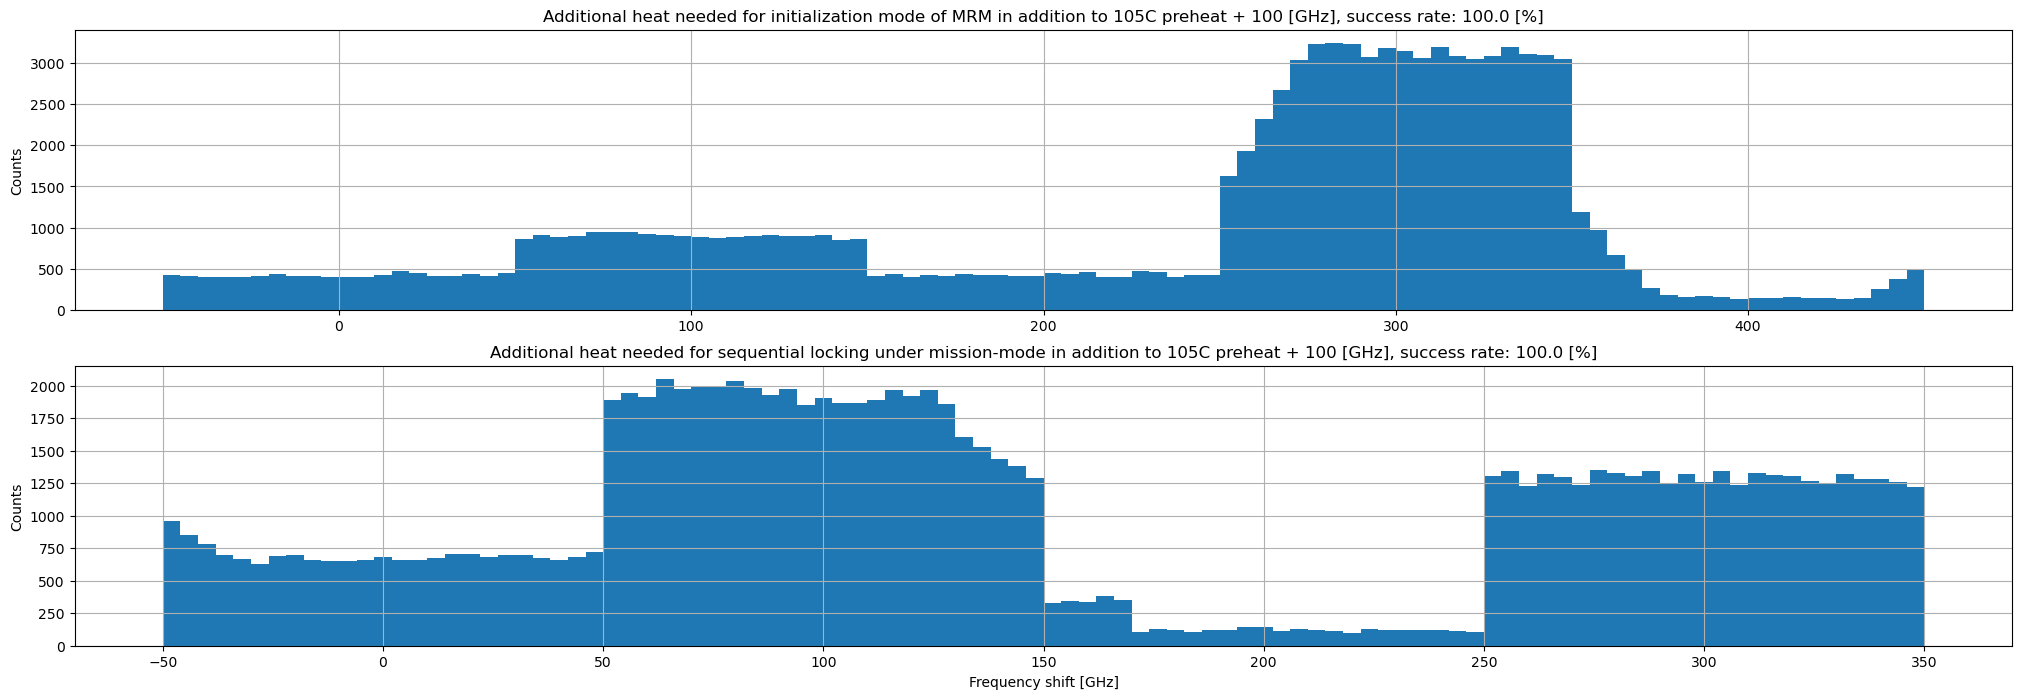

<Figure size 640x480 with 0 Axes>

In [14]:
plt.figure(figsize=(25,8))
plt.subplot(2,1,1)
plt.hist(mrm_lock_data[:,0,3].flatten(), bins = 100)
# plt.xlim([-100, 600])
plt.grid(True)
plt.title(f"Additional heat needed for initialization mode of MRM in addition to 105C preheat + 100 [GHz], success rate: {len(mrm_sequential_success_metric)/no_iterations*100:0.1f} [%]" )
plt.ylabel("Counts")
plt.subplot(2,1,2)
plt.hist(mrm_lock_data[:,0,2].flatten(), bins = 100)
# plt.xlim([-100, 600])
plt.grid(True)
plt.title(f"Additional heat needed for sequential locking under mission-mode in addition to 105C preheat + 100 [GHz], success rate: {len(mrm_sequential_success_metric)/no_iterations*100:0.1f} [%]" )
plt.xlabel("Frequency shift [GHz]")
plt.ylabel("Counts")
plt.show()
plt.tight_layout()

## CRR and MRM Cycling

In [15]:
def device_cycling(device_data, cycling_no):
  
  device_cycling = deepcopy(device_data)
  for mrm_no in range(no_mrms):
    device_cycling[mrm_no,1] =  (device_data[mrm_no,1] + cycling_no) % no_mrms
    device_cycling[mrm_no,2] =  (device_data[mrm_no,2] + cycling_no*step_sweep*2)
    
  return device_cycling

## CRR Sequential Assignment

In [16]:
# mrm_lock_data[iter_no, :, 0] = device_assigned
# mrm_lock_data[iter_no, :, 1] = laser_assigned
# mrm_lock_data[iter_no, :, 2] = heat_assigned
# mrm_lock_data[iter_no, :, 3] = heat_range
# mrm_lock_data[iter_no, :, 4] = resonance_assigned

crr_lock_data = np.zeros((no_iterations, no_crrs, 7))

crr_preheat = 2

debug = 0
crr_lock_assigned = []
for iter_no in range(no_iterations):
  mrm_lock_data_copy = deepcopy(mrm_lock_data[iter_no,:,:])
  crr_assigned = []
  laser_assigned = []
  resonance_assigned = []
  crr0_locked_bool = False
  for idx in range(len(mrm_lock_data_copy[:,0])):
    if mrm_lock_data_copy[idx,0] == 0:
      break
  for mrm_cycling_no in range(no_mrm_cycling_steps):
    if not crr0_locked_bool:
      mrm_cycling_step_assigned = []
      crr_cycling_step_assigned = []
      crr_step_assigned = []
      heat_assigned = []
      mrm_lock_data_cycled = device_cycling(mrm_lock_data_copy, mrm_cycling_no)
      for step_no in np.linspace(0, 2, 3, dtype=int):
        if not crr0_locked_bool:
          resonances_location = crr_resonances_die_wafer_variation[0,:,iter_no] - laser_frequency[int(mrm_lock_data_cycled[idx,1])] + crr_preheat * step_sweep +  0 * step_sweep + step_sweep * step_no
          matched_bool = False
          for res_no in range(no_resonances):
            if ((resonances_location[res_no] <= (step_sweep * step_no + crr_optical_bandwidth))) and (resonances_location[res_no] >= -crr_optical_bandwidth):
              matched_bool = True
            if matched_bool:
              crr_assigned.append(0)
              laser_assigned.append(mrm_lock_data_cycled[idx,1])
              resonance_assigned.append(res_no)
              mrm_cycling_step_assigned.append(mrm_cycling_no)
              crr_cycling_step_assigned.append(step_no)
              crr_step_assigned.append(0)
              heat_assigned.append(laser_frequency[int(mrm_lock_data_cycled[idx,1])] - crr_resonances_die_wafer_variation[0,res_no,iter_no])
              crr0_locked_bool = True
              break
        if crr0_locked_bool:
          break
    
  for crr_no in range(1, no_crrs):
    for idx in range(len(mrm_lock_data_copy[:,0])):
      if int(mrm_lock_data_copy[idx,0]) == crr_no:
        break
    if crr0_locked_bool:
      locked_bool = False
      for step_no in np.linspace(-2, 5, 7, dtype=int):
        if not locked_bool:
          resonances_location = crr_resonances_die_wafer_variation[crr_no,:,iter_no] - laser_frequency[int(mrm_lock_data_cycled[idx,1])] + crr_preheat * step_sweep + crr_cycling_step_assigned[0] * step_sweep + step_no * step_sweep
          matched_bool = False
          for res_no in range(no_resonances): # sweeping for resonances
            if (step_no >= 0) and ((resonances_location[res_no] <= (step_sweep * step_no + crr_optical_bandwidth))) and (resonances_location[res_no] >= -crr_optical_bandwidth):
              matched_bool = True
            if (step_no <= 0) and ((resonances_location[res_no] >= (- step_sweep * np.abs(step_no) - crr_optical_bandwidth))) and (resonances_location[res_no] <= crr_optical_bandwidth): 
              matched_bool = True
            if matched_bool:
              laser_assigned.append(int(mrm_lock_data_cycled[idx,1]))
              crr_assigned.append(crr_no)
              resonance_assigned.append(res_no)
              mrm_cycling_step_assigned.append(mrm_cycling_step_assigned[-1])
              crr_cycling_step_assigned.append(crr_cycling_step_assigned[-1])
              crr_step_assigned.append(step_no)
              heat_assigned.append(laser_frequency[int(mrm_lock_data_cycled[idx,1])] - crr_resonances_die_wafer_variation[crr_no,res_no,iter_no])
              locked_bool = True
              break
  
  if len(crr_assigned) == no_laser_wavelengths:
    crr_lock_assigned.append(iter_no)
    crr_lock_data[iter_no, :, 0] = np.array([laser_assigned])
    crr_lock_data[iter_no, :, 1] = np.array([resonance_assigned])
    crr_lock_data[iter_no, :, 2] = np.array([heat_assigned])
    crr_lock_data[iter_no, :, 3] = np.array([mrm_cycling_step_assigned])
    crr_lock_data[iter_no, :, 4] = np.array([crr_cycling_step_assigned])
    crr_lock_data[iter_no, :, 5]  = np.array([crr_step_assigned])

print("Algorithm #1, Locked iterations: ", len(crr_lock_assigned), ", Max steps needed:", np.max(crr_lock_data[:,:,5]), ", Min steps needed:", np.min(crr_lock_data[:,:,5]))

Algorithm #1, Locked iterations:  100001 , Max steps needed: 5.0 , Min steps needed: -2.0


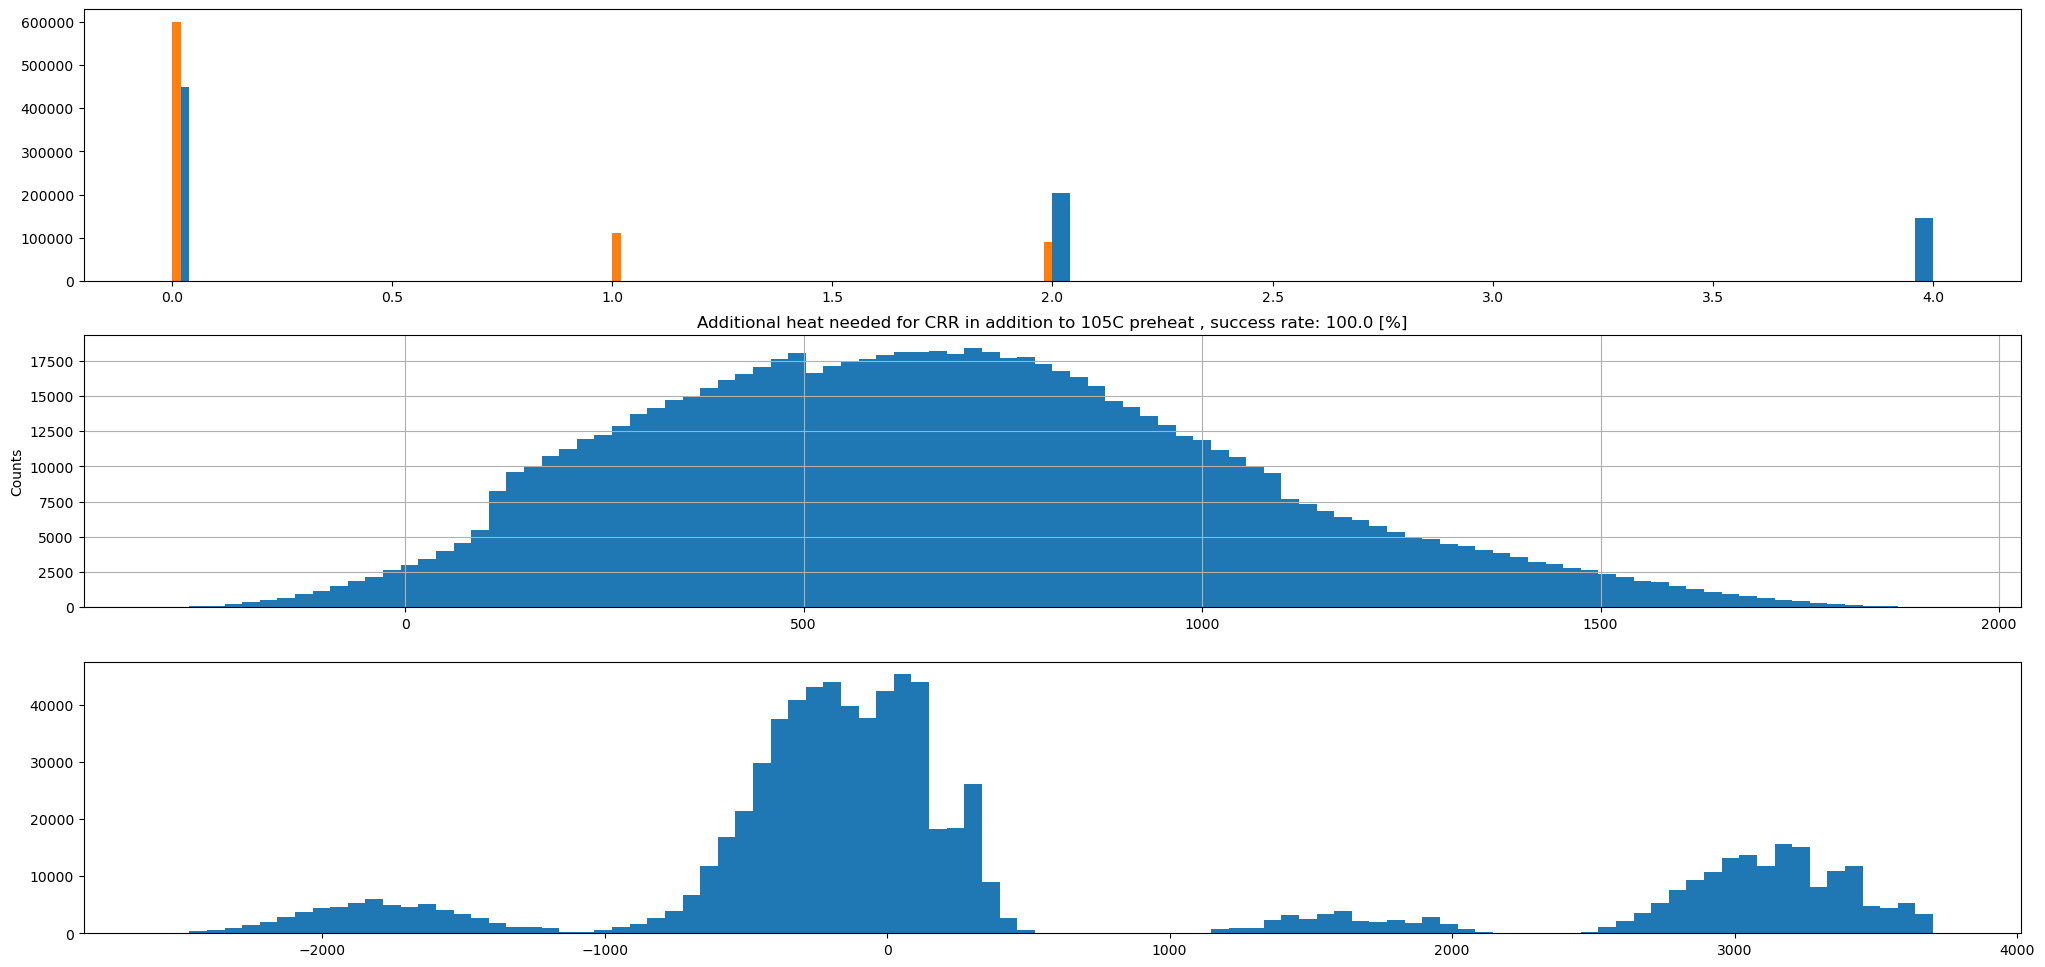

<Figure size 640x480 with 0 Axes>

In [18]:
plt.figure(figsize=(25,12))
plt.subplot(3,1,1)
plt.hist(crr_lock_data[:,:,3].flatten()*2, bins = 100)
plt.hist(crr_lock_data[:,:,4].flatten(), bins = 100)
plt.subplot(3,1,2)
plt.hist(crr_lock_data[:,:,2].flatten(), bins = 100)
plt.grid(True)
plt.title(f"Additional heat needed for CRR in addition to 105C preheat , success rate: {len(crr_lock_assigned)/no_iterations*100:0.1f} [%]" )
plt.ylabel("Counts")
plt.subplot(3,1,3)
plt.hist(mrm_lock_data[:,:,2].flatten() + (crr_lock_data[:,:,3].flatten() % 1800), bins = 100)
# plt.xlim([-400, 1800])
plt.show()
plt.tight_layout()